In [1]:
import pandas as pd
import numpy as np

import os
import sys
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans

sns.set(style="darkgrid")

In [2]:
cc_data = pd.read_excel('default of credit card clients.xls', skiprows=[0])
cc_data.set_index(['ID'], inplace=True)
col_names = cc_data.columns.values
col_names[-1] = 'default'
cc_data.columns = col_names
del cc_data['default']
print (cc_data.shape)

(30000, 23)


In [3]:
cc_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [4]:
cc_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [5]:
cc_data.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dtype: object

In [6]:
####

In [7]:
ad_data = pd.read_csv('adult.data.txt')
ad_data.shape

(32560, 15)

In [8]:
ad_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
# normalize data
cc_data_norm = cc_data.copy()
cc_data_norm = (cc_data_norm - cc_data_norm.min()) / (cc_data_norm.max() - cc_data_norm.min())

## Clustering
### k-means 

In [10]:
mdata = cc_data_norm.as_matrix()
mdata.shape

(30000, 23)

In [11]:
def explore_labels(labels_list):
    x = labels_list
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    for i in range(len(ii)):
        print ("  cluster %s: %s %%"%(str(ii[i]), str(y[i]/np.sum(y)*100)))
    freq_list = np.vstack((ii,y[ii]))
    alphab = [str(i) for i in freq_list[0]]
    pos = np.arange(len(alphab))
    width = 1.0     # gives histogram aspect to the bar diagram
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(alphab)
    plt.bar(pos, freq_list[1], width, color='b')
    plt.show()

1 Clusters
  cluster 0: 100.0 %


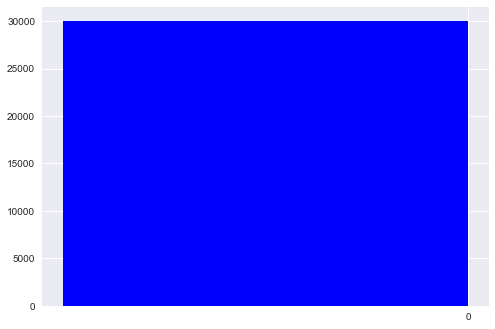

2 Clusters
  cluster 0: 39.6266666667 %
  cluster 1: 60.3733333333 %


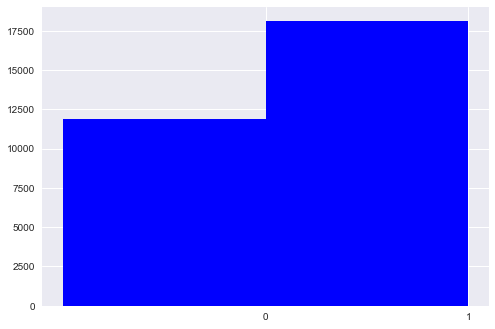

3 Clusters
  cluster 0: 39.6266666667 %
  cluster 1: 38.37 %
  cluster 2: 22.0033333333 %


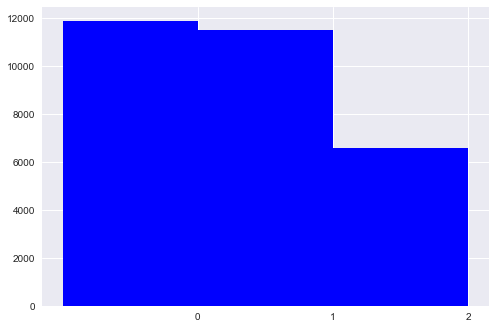

4 Clusters
  cluster 0: 38.3666666667 %
  cluster 1: 19.5466666667 %
  cluster 2: 22.0066666667 %
  cluster 3: 20.08 %


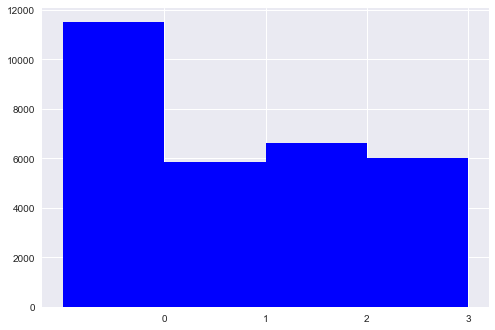

5 Clusters
  cluster 0: 26.57 %
  cluster 1: 19.12 %
  cluster 2: 22.4633333333 %
  cluster 3: 13.0566666667 %
  cluster 4: 18.79 %


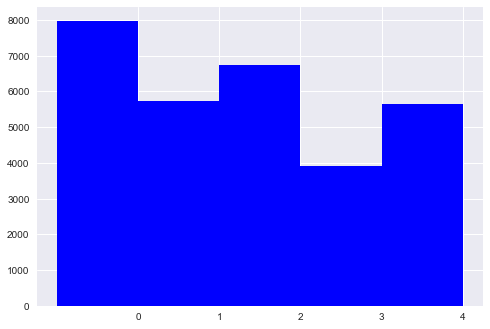

6 Clusters
  cluster 0: 22.47 %
  cluster 1: 19.1 %
  cluster 2: 5.43 %
  cluster 3: 18.92 %
  cluster 4: 15.2766666667 %
  cluster 5: 18.8033333333 %


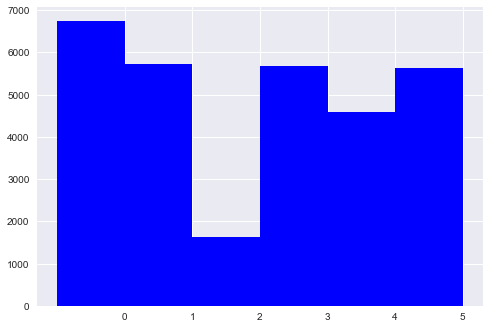

7 Clusters
  cluster 0: 20.3666666667 %
  cluster 1: 17.7833333333 %
  cluster 2: 5.43 %
  cluster 3: 18.92 %
  cluster 4: 15.2766666667 %
  cluster 5: 11.0366666667 %
  cluster 6: 11.1866666667 %


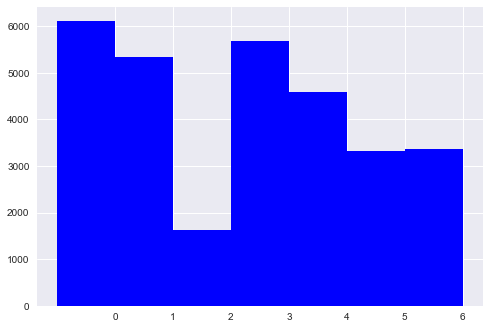

8 Clusters
  cluster 0: 8.22333333333 %
  cluster 1: 15.0633333333 %
  cluster 2: 22.13 %
  cluster 3: 17.8766666667 %
  cluster 4: 11.0633333333 %
  cluster 5: 16.3166666667 %
  cluster 6: 4.02333333333 %
  cluster 7: 5.30333333333 %


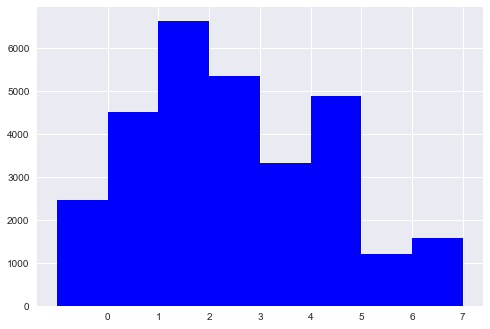

9 Clusters
  cluster 0: 16.2533333333 %
  cluster 1: 11.06 %
  cluster 2: 4.68 %
  cluster 3: 4.02333333333 %
  cluster 4: 20.17 %
  cluster 5: 14.0433333333 %
  cluster 6: 8.21666666667 %
  cluster 7: 16.3266666667 %
  cluster 8: 5.22666666667 %


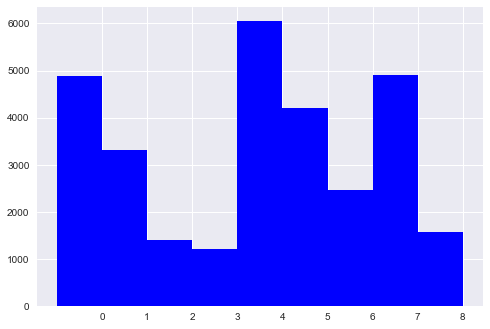

10 Clusters
  cluster 0: 3.47666666667 %
  cluster 1: 11.04 %
  cluster 2: 3.92 %
  cluster 3: 11.0166666667 %
  cluster 4: 7.98 %
  cluster 5: 5.00666666667 %
  cluster 6: 17.6833333333 %
  cluster 7: 15.6266666667 %
  cluster 8: 9.6 %
  cluster 9: 14.65 %


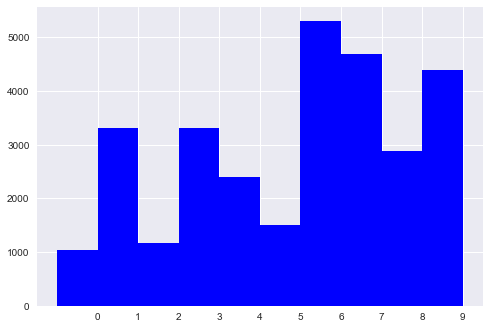

11 Clusters
  cluster 0: 4.47666666667 %
  cluster 1: 7.98333333333 %
  cluster 2: 10.0233333333 %
  cluster 3: 14.6466666667 %
  cluster 4: 16.87 %
  cluster 5: 14.5133333333 %
  cluster 6: 9.58666666667 %
  cluster 7: 10.0 %
  cluster 8: 3.91 %
  cluster 9: 3.5 %
  cluster 10: 4.49 %


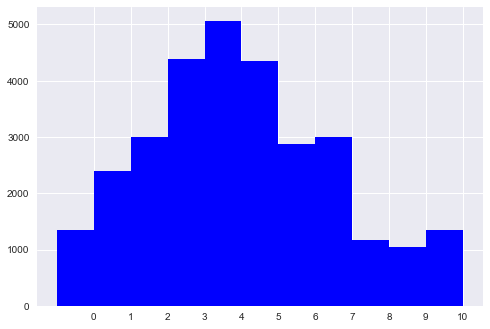

12 Clusters
  cluster 0: 3.53666666667 %
  cluster 1: 10.0266666667 %
  cluster 2: 16.8566666667 %
  cluster 3: 14.51 %
  cluster 4: 8.62 %
  cluster 5: 5.87 %
  cluster 6: 3.32333333333 %
  cluster 7: 4.50666666667 %
  cluster 8: 5.56 %
  cluster 9: 4.47666666667 %
  cluster 10: 12.7166666667 %
  cluster 11: 9.99666666667 %


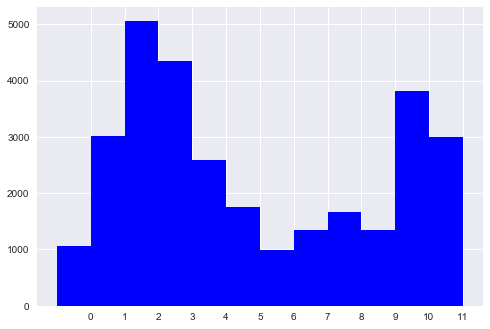

13 Clusters
  cluster 0: 10.0833333333 %
  cluster 1: 12.73 %
  cluster 2: 9.84666666667 %
  cluster 3: 9.35333333333 %
  cluster 4: 5.86666666667 %
  cluster 5: 4.33 %
  cluster 6: 5.56333333333 %
  cluster 7: 3.49 %
  cluster 8: 8.64 %
  cluster 9: 6.42 %
  cluster 10: 16.2933333333 %
  cluster 11: 4.04666666667 %
  cluster 12: 3.33666666667 %


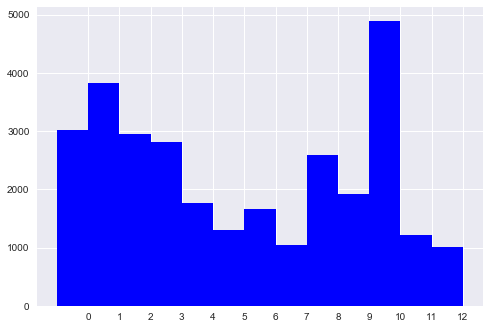

14 Clusters
  cluster 0: 3.09 %
  cluster 1: 4.07 %
  cluster 2: 8.36666666667 %
  cluster 3: 10.02 %
  cluster 4: 9.84666666667 %
  cluster 5: 10.26 %
  cluster 6: 4.33333333333 %
  cluster 7: 6.44333333333 %
  cluster 8: 16.3066666667 %
  cluster 9: 9.35333333333 %
  cluster 10: 3.52666666667 %
  cluster 11: 3.35666666667 %
  cluster 12: 5.82666666667 %
  cluster 13: 5.2 %


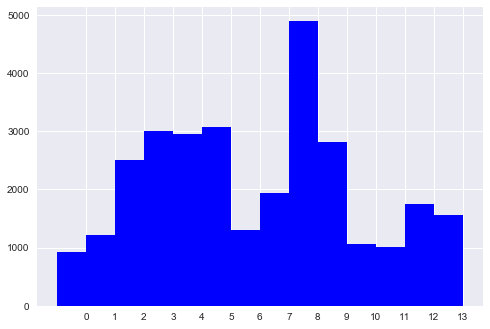

15 Clusters
  cluster 0: 9.16 %
  cluster 1: 3.33333333333 %
  cluster 2: 9.16666666667 %
  cluster 3: 8.39 %
  cluster 4: 6.05 %
  cluster 5: 5.2 %
  cluster 6: 9.22 %
  cluster 7: 3.83 %
  cluster 8: 10.2666666667 %
  cluster 9: 3.54666666667 %
  cluster 10: 4.00666666667 %
  cluster 11: 14.6833333333 %
  cluster 12: 3.07 %
  cluster 13: 4.25666666667 %
  cluster 14: 5.82 %


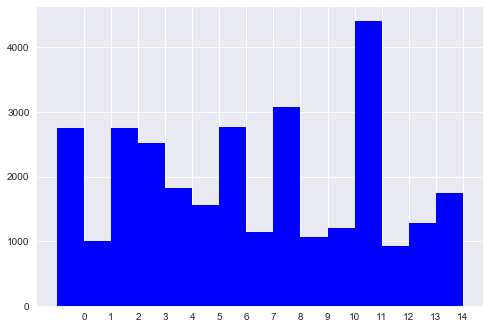

In [12]:
inertia_list=[]
number_of_clusters = 15
for i in range(number_of_clusters):
    kmeans = KMeans(n_clusters=i+1, random_state=0)
    kmeans.fit(mdata)
    #print(kmeans.labels_)
    #print(kmeans.inertia_ )
    print("%s Clusters"%str(i+1))
    inertia_list.append(kmeans.inertia_ )
    explore_labels(kmeans.labels_)

### Inertia plot

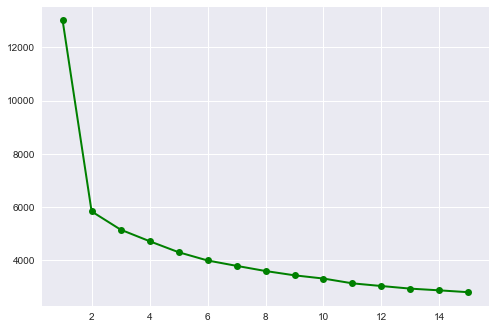

In [13]:
#print(inertia_list)
plt.plot(range(1,len(inertia_list)+1),inertia_list, 'go-', label='inertia', linewidth=2)
plt.show()

In [14]:
### Cluster selected!

In [19]:
clusters = 6
kmeans = KMeans(n_clusters=clusters, random_state=0)
kmeans.fit(mdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [20]:
len(kmeans.labels_)

30000

In [23]:
cc_data = pd.read_excel('default of credit card clients.xls', skiprows=[0])
cc_data.set_index(['ID'], inplace=True)
col_names = cc_data.columns.values
col_names[-1] = 'default'
cc_data.columns = col_names

In [24]:
cc_data['cluster'] = kmeans.labels_

In [25]:
cc_clustered_data = cc_data[['cluster','default']]

In [26]:
cc_clustered_data.sample(10)

,cluster,default
ID,,
17744,5,1
9701,5,0
20455,3,0
7477,1,1
24694,3,0
5275,3,1
11898,3,0
20951,4,0
28523,5,0


In [30]:
cc_default_prop = cc_clustered_data.groupby(['cluster'])['default'].mean()

In [41]:
cc_default_prop

cluster
0    0.214212
1    0.249913
2    0.607735
3    0.173890
4    0.195505
5    0.157242
Name: default, dtype: float64

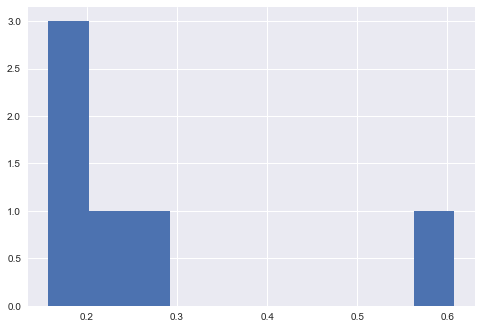

In [31]:
cc_default_prop.hist()
plt.show()

In [42]:
cc_default_prop.iloc[0]

0.21421154131434506

In [44]:
cc_clustered_data['prior_default'] = [cc_default_prop.iloc[cluster] for cluster in cc_clustered_data['cluster']]

C:\Users\miguel.wanderley\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
cc_clustered_data

,cluster,default,prior_default
ID,,,
1,1,1,0.249913
2,0,1,0.214212
3,0,0,0.214212
4,1,0,0.249913
5,4,0,0.195505
6,3,0,0.173890
7,3,0,0.173890
8,0,0,0.214212
9,1,0,0.249913


In [46]:
cc_clustered_data['prior_default'].to_csv('default_prior_data.csv')

In [48]:
cc_clustered_data.default.sum()/ len(cc_clustered_data)


0.2212